In [158]:
from keras import datasets, models, metrics, layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow logging

In [151]:
cifar10 = tf.keras.datasets.cifar10 #Load dataset

In [152]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data() #train test segreagation

In [153]:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 
    'dog', 'frog', 'horse', 'ship', 'truck'
]

In [154]:
print(train_images.shape)
print(train_labels.shape)
print(train_labels[3][0])

(50000, 32, 32, 3)
(50000, 1)
4


In [155]:
train_images = train_images / 255.0
test_images = test_images / 255.0

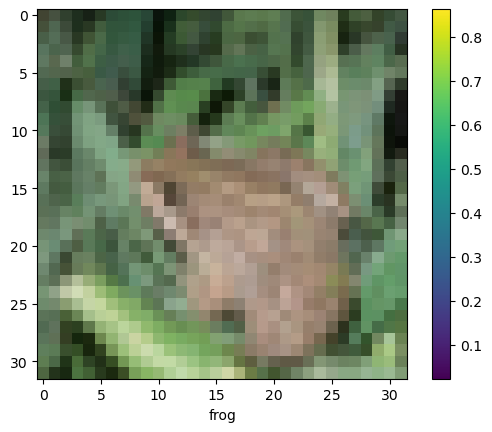

In [159]:
ImgNum = 4

plt.figure()
plt.imshow(test_images[ImgNum])
plt.xlabel(class_names[test_labels[ImgNum][0]])
plt.colorbar()
plt.grid(False)
plt.show()


In [161]:
#Creat the model

model = tf.keras.models.Sequential(name='ConvNet')
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))


In [162]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [106]:
model.summary()

Model: "ConvNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [163]:
model.compile(optimizer='adam', 

loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

metrics=['accuracy'])
 

In [109]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images,test_labels))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7992 - loss: 0.5719 - val_accuracy: 0.7033 - val_loss: 0.8850
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8113 - loss: 0.5396 - val_accuracy: 0.7090 - val_loss: 0.8999
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8152 - loss: 0.5221 - val_accuracy: 0.7113 - val_loss: 0.9045
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8293 - loss: 0.4850 - val_accuracy: 0.7108 - val_loss: 0.8999
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8386 - loss: 0.4557 - val_accuracy: 0.7182 - val_loss: 0.9122


In [164]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels, verbose=2)

313/313 - 2s - 7ms/step - accuracy: 0.1221 - loss: 2.3104


In [165]:
image = test_images[4]

prediction = model.predict(np.array([image]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


In [166]:
prediction

array([[-0.0105282 , -0.05096902,  0.08907015, -0.0950868 , -0.1262891 ,
         0.08967167,  0.10935956, -0.09270662, -0.15646973,  0.04352508]],
      dtype=float32)

In [167]:
class_names[np.argmax(prediction)]

'frog'

In [168]:
#Data Augmentation

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [169]:
#Pick image to transform
test_img = train_images[14]
img = tf.keras.preprocessing.image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)

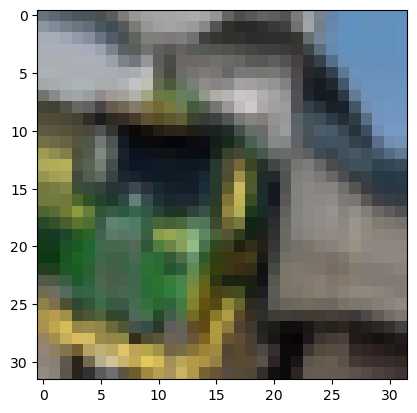

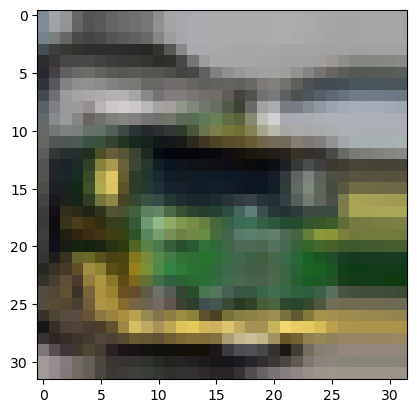

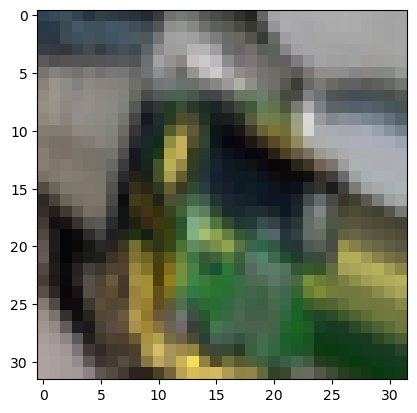

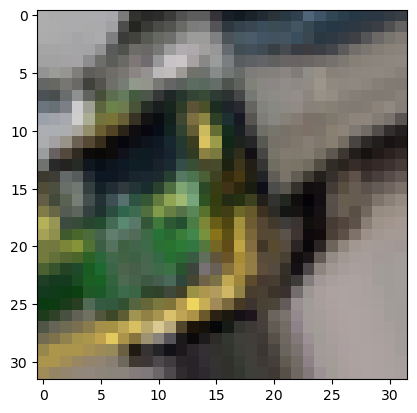

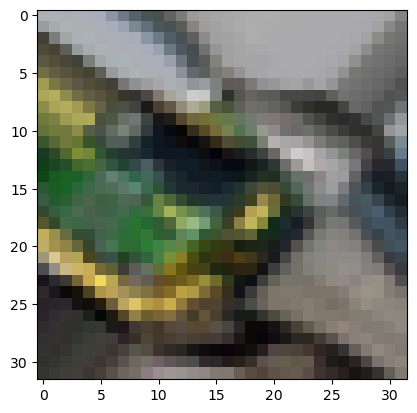

In [149]:
i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
    plt.figure(i)
    plot = plt.imshow(tf.keras.preprocessing.image.img_to_array(batch[0]))
    i += 1
    if i > 4:
        break

plt.show()